In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:

df = pd.read_csv('House_Price.csv',header = 0)


# # Observations 
# 
# * There are outliers in crimerate, n_hot_rooms and rainfall
# * bus_ter has only one value.
# * n_hos_beds   is having null values

np.percentile(df.n_hot_rooms,[99])


# In[30]:


#Trying to find out value at 99 percentile 
np.percentile(df.n_hot_rooms,[99])[0]


upper_limit = np.percentile(df.n_hot_rooms,[99])[0]




df.n_hot_rooms [(df.n_hot_rooms >upper_limit*3 )] = 3 * upper_limit

#As there are outlier at the lower end we are trying to find the lower limit and multiple by .3 
np.percentile(df.rainfall,[1])[0]


lower_value = np.percentile(df.rainfall,[1])[0]


df.rainfall[(df.rainfall < lower_value * .3)] = lower_value * .3


df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())



# To convert the relationship between crime rate with price which is in the form of log equation and to transform this
# we should have a relationship which is linear we use the below( addition of 1 is done because )
df.crime_rate = np.log(1 + df.crime_rate)

df['ave_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4


del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']

del df['bus_ter']


df = pd.get_dummies(df)

#aiport_YES is convying the same information as ariport_NO. Similarly waterbody_None is redudant
del df['airport_NO']
del df['waterbody_None']

C:\Users\Swapna Bojanki\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Swapna Bojanki\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,ave_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [4]:
import statsmodels.api as sm


In [5]:
X = sm.add_constant(df['room_num'])

C:\Users\Swapna Bojanki\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
lm = sm.OLS(df['price'],X).fit()

In [7]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           1.31e-74
Time:                        00:48:49   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#Another Method used is to use sklearn
from sklearn.linear_model import LinearRegression

In [9]:
y = df['price']

In [10]:
X = df[['room_num']]

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(lr.intercept_, lr.coef_)

-34.6592431230972 [9.09966966]


In [14]:
help(lr)

Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin, sklearn.base.MultiOutputMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False

In [15]:
lr.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [16]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

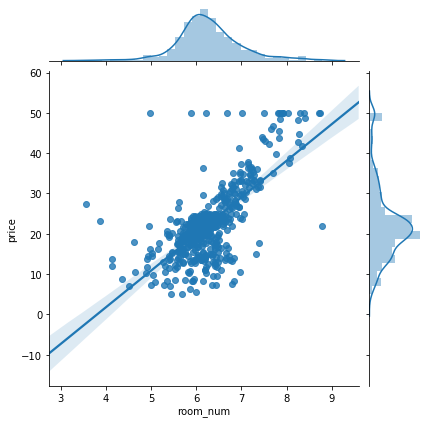

In [17]:
sns.jointplot(x=df['room_num'],y = df['price'],data=df,kind = "reg")

In [18]:
y_multi = df['price']

In [19]:
x_multi = df.drop('price', axis = 1)

In [20]:
x_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,ave_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [21]:
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [23]:
lr_multi = LinearRegression()

In [24]:
lr_multi.fit(x_multi,y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(lr_multi.intercept_,lr_multi.coef_)

-7.008433659558154 [ 3.18711520e-02 -4.26679062e-02 -2.08546844e+01  4.01281976e+00
 -5.51042760e-03  1.01168089e+00 -5.79134299e-01  3.40432813e-01
  8.76278098e-02  1.63090790e-02  5.91167254e+01 -1.21662090e+00
  1.11207644e+00  2.59412451e-01 -6.84079711e-01 -2.75176945e-01]


In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size = .2,random_state = 0)

In [32]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(404, 16) (102, 16) (404,) (102,)


In [33]:
lr_multi_a = LinearRegression()

In [34]:
lr_multi_a.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_test_a = lr_multi_a.predict(x_test)

In [36]:
y_train_a = lr_multi_a.predict(x_train)

In [37]:
from sklearn.metrics import r2_score

In [41]:
# to get the r square error
r2_score?

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data

In [39]:
r2_score(y_test,y_test_a)

0.5479196494258673

In [40]:
r2_score(y_train,y_train_a)

0.7576602212832155